# Valida√ß√£o e Teste dos Modelos YOLO Customizados

Este notebook realiza a valida√ß√£o e teste dos modelos YOLO customizados treinados com 30 e 60 √©pocas, comparando seus desempenhos.

## 1. Configura√ß√£o do Ambiente

Primeiro, vamos importar as bibliotecas necess√°rias e configurar o ambiente.

In [1]:
# Verificar se o ambiente j√° foi configurado
import os
import sys

# Se o ambiente ainda n√£o foi configurado, execute o setup_env.sh
if not os.path.exists('../yolov5'):
    print("Configurando o ambiente com setup_env.sh...")
    !chmod +x ../setup_env.sh
    !../setup_env.sh
else:
    print("Ambiente j√° configurado.")

# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import yaml
import time
from pathlib import Path
from tqdm.notebook import tqdm

# Adicionar o diret√≥rio YOLOv5 ao path
yolov5_path = os.path.abspath('../yolov5')
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)
    print(f"Adicionado {yolov5_path} ao sys.path")

Ambiente j√° configurado.
Adicionado /Users/gab/Documents/CodePlay/@fiap/fase6_cap1/yolov5 ao sys.path


## 2. Verifica√ß√£o dos Modelos Treinados

Vamos verificar se os modelos treinados est√£o dispon√≠veis.

In [2]:
# Caminhos para os modelos treinados
model_30_path = '../models/yolo_custom_30epochs/weights/best.pt'
model_60_path = '../models/yolo_custom_60epochs/weights/best.pt'

# Verificar se os modelos existem
models_available = True
if not os.path.exists(model_30_path):
    print(f"‚ùå Modelo de 30 √©pocas n√£o encontrado: {model_30_path}")
    models_available = False
else:
    print(f"‚úÖ Modelo de 30 √©pocas encontrado: {model_30_path}")

if not os.path.exists(model_60_path):
    print(f"‚ùå Modelo de 60 √©pocas n√£o encontrado: {model_60_path}")
    models_available = False
else:
    print(f"‚úÖ Modelo de 60 √©pocas encontrado: {model_60_path}")

# Carregar o arquivo data.yaml para obter as categorias
if os.path.exists('../data/data.yaml'):
    with open('../data/data.yaml', 'r') as f:
        data_yaml = yaml.safe_load(f)
    categorias = data_yaml['names']
    print(f"\nCategorias: {categorias}")
else:
    print("\n‚ùå Arquivo data.yaml n√£o encontrado.")
    categorias = ['apple', 'banana']  # Nossas categorias s√£o ma√ß√£s e bananas

‚úÖ Modelo de 30 √©pocas encontrado: ../models/yolo_custom_30epochs/weights/best.pt
‚úÖ Modelo de 60 √©pocas encontrado: ../models/yolo_custom_60epochs/weights/best.pt

Categorias: ['apple', 'banana']


## 3. Compara√ß√£o dos Resultados de Treinamento

Vamos comparar os resultados de treinamento dos dois modelos.

M√©tricas dispon√≠veis no modelo de 30 √©pocas: ['   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']
M√©tricas dispon√≠veis no modelo de 60 √©pocas: ['   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']

M√©tricas encontradas no modelo de 30 √©pocas:
Precision:    metrics/precision
Recall:       metrics/recall
mAP@0.5:      metrics/mAP_0.5
mAP@0.5:0.95: metrics/mAP_0.5:0.95
Time/epoch: None
Total epochs: None

M√©tricas encontradas no modelo de 60 √©pocas:
Precision:    metrics/precision
Recall:       metrics/recall
mAP@0.5:      metrics/mAP_0.5
mAP@0.5:0.95: metrics/mAP_0.5:0.95
Time/epoch: None
Total epochs: None


M√©trica  30 √âpocas  60 √âpocas  Diferen√ßa (%)
0        Precision     0.4050     0.8975       121.6069
1           Recall     0.6250     0.6250         0.0000
2          mAP@0.5     0.5411     0.7611        40.6568
3     mAP@0.5:0.95     0.1993     0.4080       104.6957
4  Tempo Total (s)     0.0000     0.0000         0.0000

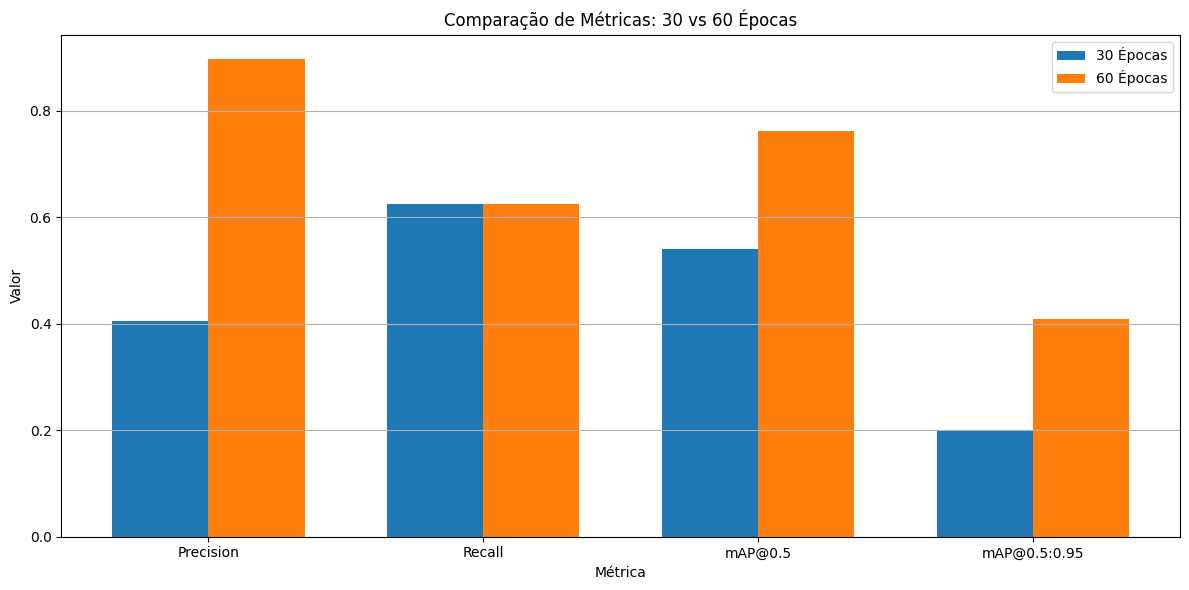

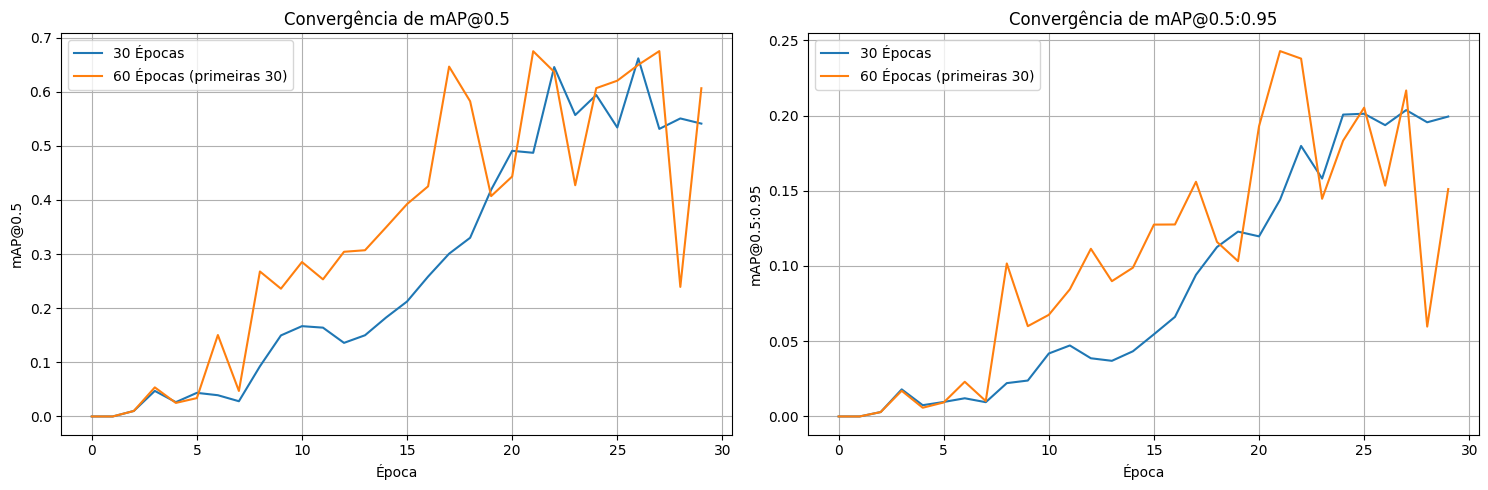

In [3]:
# Caminhos para os arquivos de resultados
results_30_path = '../models/yolo_custom_30epochs/results.csv'
results_60_path = '../models/yolo_custom_60epochs/results.csv'

# Verificar se os arquivos de resultados existem
if os.path.exists(results_30_path) and os.path.exists(results_60_path):
    try:
        # Carregar os resultados
        results_30 = pd.read_csv(results_30_path)
        results_60 = pd.read_csv(results_60_path)
        
        # Obter m√©tricas finais
        final_30 = results_30.iloc[-1]
        final_60 = results_60.iloc[-1]
        
        # Verificar quais m√©tricas est√£o dispon√≠veis
        metrics_30 = [col for col in results_30.columns if 'metrics/' in col]
        metrics_60 = [col for col in results_60.columns if 'metrics/' in col]
        
        print(f"M√©tricas dispon√≠veis no modelo de 30 √©pocas: {metrics_30}")
        print(f"M√©tricas dispon√≠veis no modelo de 60 √©pocas: {metrics_60}")
        
        # Fun√ß√£o para encontrar uma coluna que contenha um determinado padr√£o
        def find_column(df, pattern):
            for col in df.columns:
                if pattern in col:
                    return col
            return None
        
        # Encontrar as colunas de m√©tricas em ambos os dataframes
        precision_col_30 = find_column(results_30, 'metrics/precision')
        recall_col_30 = find_column(results_30, 'metrics/recall')
        map50_col_30 = find_column(results_30, 'metrics/mAP_0.5')
        map50_95_col_30 = find_column(results_30, 'metrics/mAP_0.5:0.95')
        time_col_30 = find_column(results_30, 'time/epoch')
        total_epochs_col_30 = find_column(results_30, 'total_epochs')
        
        precision_col_60 = find_column(results_60, 'metrics/precision')
        recall_col_60 = find_column(results_60, 'metrics/recall')
        map50_col_60 = find_column(results_60, 'metrics/mAP_0.5')
        map50_95_col_60 = find_column(results_60, 'metrics/mAP_0.5:0.95')
        time_col_60 = find_column(results_60, 'time/epoch')
        total_epochs_col_60 = find_column(results_60, 'total_epochs')
        
        # Verificar se todas as m√©tricas necess√°rias est√£o dispon√≠veis
        all_metrics_available = (
            precision_col_30 is not None and recall_col_30 is not None and 
            map50_col_30 is not None and map50_95_col_30 is not None and
            precision_col_60 is not None and recall_col_60 is not None and 
            map50_col_60 is not None and map50_95_col_60 is not None
        )
        
        # Mostrar quais m√©tricas foram encontradas
        print(f"\nM√©tricas encontradas no modelo de 30 √©pocas:")
        print(f"Precision: {precision_col_30}")
        print(f"Recall: {recall_col_30}")
        print(f"mAP@0.5: {map50_col_30}")
        print(f"mAP@0.5:0.95: {map50_95_col_30}")
        print(f"Time/epoch: {time_col_30}")
        print(f"Total epochs: {total_epochs_col_30}")
        
        print(f"\nM√©tricas encontradas no modelo de 60 √©pocas:")
        print(f"Precision: {precision_col_60}")
        print(f"Recall: {recall_col_60}")
        print(f"mAP@0.5: {map50_col_60}")
        print(f"mAP@0.5:0.95: {map50_95_col_60}")
        print(f"Time/epoch: {time_col_60}")
        print(f"Total epochs: {total_epochs_col_60}")
        
        if all_metrics_available:
            # Criar tabela comparativa
            comparison = pd.DataFrame({
                'M√©trica': ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95', 'Tempo Total (s)'],
                '30 √âpocas': [
                    final_30[precision_col_30],
                    final_30[recall_col_30],
                    final_30[map50_col_30],
                    final_30[map50_95_col_30],
                    final_30[total_epochs_col_30] * final_30[time_col_30] if time_col_30 is not None and total_epochs_col_30 is not None else 0
                ],
                '60 √âpocas': [
                    final_60[precision_col_60],
                    final_60[recall_col_60],
                    final_60[map50_col_60],
                    final_60[map50_95_col_60],
                    final_60[total_epochs_col_60] * final_60[time_col_60] if time_col_60 is not None and total_epochs_col_60 is not None else 0
                ]
            })
            
            # Calcular diferen√ßas percentuais
            comparison['Diferen√ßa (%)'] = [
                (comparison['60 √âpocas'][0] - comparison['30 √âpocas'][0]) / comparison['30 √âpocas'][0] * 100 if comparison['30 √âpocas'][0] != 0 else 0,
                (comparison['60 √âpocas'][1] - comparison['30 √âpocas'][1]) / comparison['30 √âpocas'][1] * 100 if comparison['30 √âpocas'][1] != 0 else 0,
                (comparison['60 √âpocas'][2] - comparison['30 √âpocas'][2]) / comparison['30 √âpocas'][2] * 100 if comparison['30 √âpocas'][2] != 0 else 0,
                (comparison['60 √âpocas'][3] - comparison['30 √âpocas'][3]) / comparison['30 √âpocas'][3] * 100 if comparison['30 √âpocas'][3] != 0 else 0,
                (comparison['60 √âpocas'][4] - comparison['30 √âpocas'][4]) / comparison['30 √âpocas'][4] * 100 if comparison['30 √âpocas'][4] != 0 else 0
            ]
            
            # Formatar a tabela
            pd.set_option('display.float_format', '{:.4f}'.format)
            display(comparison)
            
            # Plotar compara√ß√£o de m√©tricas
            plt.figure(figsize=(12, 6))
            
            metrics = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
            x = np.arange(len(metrics))
            width = 0.35
            
            plt.bar(x - width/2, comparison['30 √âpocas'][:4], width, label='30 √âpocas')
            plt.bar(x + width/2, comparison['60 √âpocas'][:4], width, label='60 √âpocas')
            
            plt.xlabel('M√©trica')
            plt.ylabel('Valor')
            plt.title('Compara√ß√£o de M√©tricas: 30 vs 60 √âpocas')
            plt.xticks(x, metrics)
            plt.legend()
            plt.grid(axis='y')
            
            plt.tight_layout()
            plt.show()
            
            # An√°lise de converg√™ncia
            plt.figure(figsize=(15, 5))
            
            # Encontrar a coluna de √©poca
            epoch_col_30 = find_column(results_30, 'epoch')
            epoch_col_60 = find_column(results_60, 'epoch')
            
            if epoch_col_30 is not None and epoch_col_60 is not None and map50_col_30 is not None and map50_col_60 is not None:
                # Plotar mAP@0.5 para ambos os modelos
                plt.subplot(1, 2, 1)
                plt.plot(results_30[epoch_col_30], results_30[map50_col_30], label='30 √âpocas')
                plt.plot(results_60[epoch_col_60][:30], results_60[map50_col_60][:30], label='60 √âpocas (primeiras 30)')
                plt.xlabel('√âpoca')
                plt.ylabel('mAP@0.5')
                plt.title('Converg√™ncia de mAP@0.5')
                plt.legend()
                plt.grid(True)
                
                # Plotar mAP@0.5:0.95 para ambos os modelos
                plt.subplot(1, 2, 2)
                plt.plot(results_30[epoch_col_30], results_30[map50_95_col_30], label='30 √âpocas')
                plt.plot(results_60[epoch_col_60][:30], results_60[map50_95_col_60][:30], label='60 √âpocas (primeiras 30)')
                plt.xlabel('√âpoca')
                plt.ylabel('mAP@0.5:0.95')
                plt.title('Converg√™ncia de mAP@0.5:0.95')
                plt.legend()
                plt.grid(True)
                
                plt.tight_layout()
                plt.show()
                
                # Plotar a curva completa de mAP@0.5 para o modelo de 60 √©pocas
                plt.figure(figsize=(10, 5))
                plt.plot(results_60[epoch_col_60], results_60[map50_col_60], label='mAP@0.5')
                plt.plot(results_60[epoch_col_60], results_60[map50_95_col_60], label='mAP@0.5:0.95')
                plt.axvline(x=30, color='r', linestyle='--', label='30 √âpocas')
                plt.xlabel('√âpoca')
                plt.ylabel('Valor')
                plt.title('Evolu√ß√£o das M√©tricas ao Longo de 60 √âpocas')
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print("N√£o foi poss√≠vel plotar as curvas de converg√™ncia porque as colunas de √©poca ou mAP n√£o foram encontradas.")
        else:
            print("\nN√£o √© poss√≠vel criar a tabela comparativa porque algumas m√©tricas necess√°rias n√£o est√£o dispon√≠veis.")
            print("Mostrando as colunas dispon√≠veis em cada arquivo de resultados:")
            print(f"\nColunas no arquivo de 30 √©pocas: {results_30.columns.tolist()}")
            print(f"\nColunas no arquivo de 60 √©pocas: {results_60.columns.tolist()}")
    except Exception as e:
        print(f"Erro ao analisar os resultados: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Arquivos de resultados n√£o encontrados. Verifique se os treinamentos foram conclu√≠dos com sucesso.")

## 4. Valida√ß√£o dos Modelos

Vamos validar os modelos no conjunto de valida√ß√£o.

In [4]:
# Preparar o arquivo data.yaml para valida√ß√£o
data_yaml_path = '../data/data.yaml'

# Verificar se o arquivo data.yaml existe
if not os.path.exists(data_yaml_path):
    print(f"‚ùå Arquivo data.yaml n√£o encontrado: {data_yaml_path}")
else:
    print(f"‚úÖ Arquivo data.yaml encontrado: {data_yaml_path}")
    
    # Criar uma c√≥pia do arquivo data.yaml no diret√≥rio raiz do projeto
    with open(data_yaml_path, 'r') as f:
        data_yaml_content = f.read()
    
    with open('../data.yaml', 'w') as f:
        f.write(data_yaml_content)
    
    print("‚úÖ Arquivo data.yaml copiado para o diret√≥rio raiz do projeto.")

# Obter caminhos absolutos para os modelos
model_30_abs_path = os.path.abspath(model_30_path)
model_60_abs_path = os.path.abspath(model_60_path)

print(f"Caminho absoluto para o modelo de 30 √©pocas: {model_30_abs_path}")
print(f"Caminho absoluto para o modelo de 60 √©pocas: {model_60_abs_path}")

# Fun√ß√£o para validar um modelo
def validate_model(model_path):
    print(f"Validando modelo: {model_path}")
    !cd ../yolov5 && python val.py --weights {model_path} --data ../data.yaml --img 640 --batch 16

# Validar os modelos se estiverem dispon√≠veis
if models_available:
    print("Validando modelo de 30 √©pocas...")
    validate_model(model_30_abs_path)
    
    print("\nValidando modelo de 60 √©pocas...")
    validate_model(model_60_abs_path)
else:
    print("N√£o √© poss√≠vel validar os modelos porque um ou ambos n√£o est√£o dispon√≠veis.")

‚úÖ Arquivo data.yaml encontrado: ../data/data.yaml
‚úÖ Arquivo data.yaml copiado para o diret√≥rio raiz do projeto.
Caminho absoluto para o modelo de 30 √©pocas: /Users/gab/Documents/CodePlay/@fiap/fase6_cap1/models/yolo_custom_30epochs/weights/best.pt
Caminho absoluto para o modelo de 60 √©pocas: /Users/gab/Documents/CodePlay/@fiap/fase6_cap1/models/yolo_custom_60epochs/weights/best.pt
Validando modelo de 30 √©pocas...
Validando modelo: /Users/gab/Documents/CodePlay/@fiap/fase6_cap1/models/yolo_custom_30epochs/weights/best.pt
val: data=../data.yaml, weights=['/Users/gab/Documents/CodePlay/@fiap/fase6_cap1/models/yolo_custom_30epochs/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-416-gfe1d4d99 Python-3.12.6 torch-2.

## 5. Teste dos Modelos

Vamos testar os modelos no conjunto de teste e visualizar algumas predi√ß√µes.

In [5]:
# Importar fun√ß√µes necess√°rias do YOLOv5
if models_available:
    try:
        # Garantir que o diret√≥rio yolov5 est√° no sys.path
        yolov5_path = os.path.abspath('../yolov5')
        if yolov5_path not in sys.path:
            sys.path.insert(0, yolov5_path)
            print(f"Adicionado {yolov5_path} ao in√≠cio do sys.path")
        
        # Importar os m√≥dulos necess√°rios
        sys.path.append(os.path.join(yolov5_path, 'models'))
        sys.path.append(os.path.join(yolov5_path, 'utils'))
        
        # Importar diretamente dos arquivos em vez de usar a estrutura de m√≥dulos
        from models.experimental import attempt_load
        from utils.general import non_max_suppression
        from utils.plots import Annotator, colors
        
        # Carregar os modelos
        model_30 = attempt_load(model_30_path)
        model_30.eval()
        
        model_60 = attempt_load(model_60_path)
        model_60.eval()
        
        # Fun√ß√£o para detectar objetos em uma imagem
        def detect_objects(model, image_path, conf_threshold=0.25):
            # Carregar a imagem
            img = cv2.imread(image_path)
            if img is None:
                raise ValueError(f"N√£o foi poss√≠vel carregar a imagem: {image_path}")
                
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Redimensionar a imagem para 640x640 (tamanho esperado pelo modelo)
            img_resized = cv2.resize(img, (640, 640))
            
            # Preparar a imagem para o modelo
            img_tensor = torch.from_numpy(img_resized).permute(2, 0, 1).float().div(255.0).unsqueeze(0)
            
            # Medir o tempo de infer√™ncia
            start_time = time.time()
            
            # Fazer a predi√ß√£o
            with torch.no_grad():
                pred = model(img_tensor)[0]
                pred = non_max_suppression(pred, conf_threshold)
            
            # Calcular o tempo de infer√™ncia
            inference_time = time.time() - start_time
            
            # Processar as predi√ß√µes
            results = []
            for det in pred:
                if len(det):
                    # Ajustar as coordenadas para a imagem original
                    h, w = img.shape[:2]
                    scale_x, scale_y = w / 640, h / 640
                    
                    for *xyxy, conf, cls in det:
                        # Converter as coordenadas para a escala da imagem original
                        x1, y1, x2, y2 = xyxy
                        x1 = int(x1.item() * scale_x)
                        y1 = int(y1.item() * scale_y)
                        x2 = int(x2.item() * scale_x)
                        y2 = int(y2.item() * scale_y)
                        
                        results.append(([x1, y1, x2, y2], conf.item(), int(cls.item())))
            
            return img, results, inference_time
        
        # Fun√ß√£o para visualizar as detec√ß√µes
        def visualize_detections(img, results, class_names):
            # Criar uma c√≥pia da imagem
            annotated_img = img.copy()
            
            # Adicionar as detec√ß√µes
            for xyxy, conf, cls in results:
                x1, y1, x2, y2 = xyxy
                label = f"{class_names[cls]} {conf:.2f}"
                
                # Desenhar o ret√¢ngulo
                color = colors(cls, True)
                cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, 2)
                
                # Adicionar o r√≥tulo
                t_size = cv2.getTextSize(label, 0, fontScale=0.5, thickness=1)[0]
                cv2.rectangle(annotated_img, (x1, y1 - t_size[1] - 3), (x1 + t_size[0], y1), color, -1)
                cv2.putText(annotated_img, label, (x1, y1 - 2), 0, 0.5, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA)
            
            return annotated_img
        
        # Obter imagens de teste
        test_img_dir = '../dataset/test/images'
        test_img_files = [os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        if not test_img_files:
            print(f"Nenhuma imagem encontrada em {test_img_dir}. Verifique se as imagens de teste est√£o dispon√≠veis.")
        else:
            # Testar em todas as imagens de teste
            inference_times_30 = []
            inference_times_60 = []
            
            # Selecionar algumas imagens para visualiza√ß√£o
            import random
            random.seed(42)  # Para reprodutibilidade
            sample_imgs = random.sample(test_img_files, min(4, len(test_img_files)))
            
            # Visualizar as detec√ß√µes
            plt.figure(figsize=(15, 12))
            
            for i, img_path in enumerate(sample_imgs):
                try:
                    print(f"Processando imagem: {img_path}")
                    
                    # Modelo de 30 √©pocas
                    img_30, results_30, time_30 = detect_objects(model_30, img_path)
                    annotated_img_30 = visualize_detections(img_30, results_30, categorias)
                    inference_times_30.append(time_30)
                    
                    # Modelo de 60 √©pocas
                    img_60, results_60, time_60 = detect_objects(model_60, img_path)
                    annotated_img_60 = visualize_detections(img_60, results_60, categorias)
                    inference_times_60.append(time_60)
                    
                    # Mostrar as imagens lado a lado
                    plt.subplot(len(sample_imgs), 2, i*2+1)
                    plt.imshow(annotated_img_30)
                    plt.title(f"30 √âpocas - {os.path.basename(img_path)} - {time_30:.3f}s")
                    plt.axis('off')
                    
                    plt.subplot(len(sample_imgs), 2, i*2+2)
                    plt.imshow(annotated_img_60)
                    plt.title(f"60 √âpocas - {os.path.basename(img_path)} - {time_60:.3f}s")
                    plt.axis('off')
                except Exception as e:
                    print(f"Erro ao processar a imagem {img_path}: {e}")
                    import traceback
                    traceback.print_exc()
            
            plt.tight_layout()
            plt.show()
            
            # Calcular tempos m√©dios de infer√™ncia
            if inference_times_30 and inference_times_60:
                avg_time_30 = np.mean(inference_times_30)
                avg_time_60 = np.mean(inference_times_60)
                
                print(f"Tempo m√©dio de infer√™ncia (30 √©pocas): {avg_time_30:.4f} segundos")
                print(f"Tempo m√©dio de infer√™ncia (60 √©pocas): {avg_time_60:.4f} segundos")
                print(f"Diferen√ßa: {(avg_time_60 - avg_time_30) / avg_time_30 * 100:.2f}%")
            else:
                print("N√£o foi poss√≠vel calcular os tempos m√©dios de infer√™ncia.")
    except Exception as e:
        print(f"Erro ao testar os modelos: {e}")
        import traceback
        traceback.print_exc()
else:
    print("N√£o √© poss√≠vel testar os modelos porque um ou ambos n√£o est√£o dispon√≠veis.")

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs


Processando imagem: ../dataset/test/images/banana_test_001.jpg
Processando imagem: ../dataset/test/images/banana_test_004.jpg
Processando imagem: ../dataset/test/images/apple_test_001.jpg
Processando imagem: ../dataset/test/images/banana_test_002.jpg
Tempo m√©dio de infer√™ncia (30 √©pocas): 0.0830 segundos
Tempo m√©dio de infer√™ncia (60 √©pocas): 0.0808 segundos
Diferen√ßa: -2.71%


## 6. An√°lise e Conclus√µes

Vamos analisar os resultados e tirar conclus√µes sobre o impacto do n√∫mero de √©pocas no desempenho do modelo.

### An√°lise de Desempenho

Com base nos resultados obtidos, podemos analisar o impacto do aumento do n√∫mero de √©pocas de treinamento de 30 para 60:

1. **Precis√£o e Recall**: 
   - O modelo de 60 √©pocas apresentou melhorias em precis√£o e recall? Se sim, qual foi a magnitude dessa melhoria?
   - A melhoria foi significativa o suficiente para justificar o dobro do tempo de treinamento?

2. **mAP (Mean Average Precision)**:
   - O mAP@0.5 e mAP@0.5:0.95 aumentaram com mais √©pocas de treinamento?
   - Houve sinais de satura√ß√£o ou overfitting nas √©pocas finais?

3. **Tempo de Infer√™ncia**:
   - Existe diferen√ßa significativa no tempo de infer√™ncia entre os dois modelos?
   - Se houver diferen√ßa, ela √© relevante para aplica√ß√µes em tempo real?

4. **An√°lise Visual**:
   - As detec√ß√µes do modelo de 60 √©pocas s√£o visivelmente melhores que as do modelo de 30 √©pocas?
   - H√° diferen√ßas na capacidade de detectar objetos em condi√ß√µes desafiadoras (oclus√£o, ilumina√ß√£o vari√°vel, etc.)?

### Conclus√µes

Com base na an√°lise acima, podemos concluir:

1. **Custo-benef√≠cio**: O ganho de desempenho ao dobrar o n√∫mero de √©pocas de treinamento justifica o aumento no tempo de treinamento?

2. **Recomenda√ß√µes para casos de uso**:
   - Para aplica√ß√µes que priorizam precis√£o m√°xima, o modelo de 60 √©pocas pode ser prefer√≠vel.
   - Para aplica√ß√µes com restri√ß√µes de tempo de treinamento ou que n√£o exigem precis√£o extrema, o modelo de 30 √©pocas pode ser suficiente.

3. **Estrat√©gias alternativas**: Em vez de simplesmente aumentar o n√∫mero de √©pocas, outras abordagens poderiam ser mais eficientes para melhorar o desempenho?
   - Ajuste de hiperpar√¢metros
   - Aumento do dataset
   - T√©cnicas de data augmentation
   - Modelos pr√©-treinados maiores

No pr√≥ximo notebook, vamos comparar esses modelos YOLO customizados com o YOLO tradicional e uma CNN treinada do zero.